## Checkpoint 2

#### Import Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit

rng = np.random.default_rng(1245) #setting the seed for the random number generator

Function to generate 1000 random numbers from an exponential distribution scaled to 2.2 within a cutoff. 

In [3]:
def mean_t_run(cutoff):
    rno =rng.exponential(2.2,size=1000)

    while np.any(rno > cutoff):
        rno[rno > cutoff] = rng.exponential(2.2,size=len(rno[rno > cutoff]))
    return np.mean(rno),rno

Plot a histogram of values from one single run of the function.

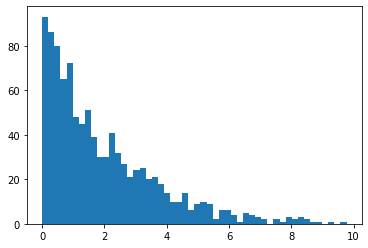

In [4]:
mean_1,rno = mean_t_run(10)


plt.hist(rno,bins=50)
plt.show()

In [5]:
print("Average value of tau from the run : "+str(mean_1))

Average value of tau from the run : 1.9470816425616897


The average value obtained is less than the characteristic value. If I run the code with a higher cutoff than 10, the average value is much closer to the characteristic value. Clearly, the contribution from higher values is still substanial even if they don't have a high count. In a real decay, there is no abstract cutoff for a real process. Therefore, the value is underestimated because the higher decay times are not taken into account in this run. 

## Monte-Carlo Run

In [6]:
n = 500
t_values = np.zeros(n)

for i in range(n):
    t_values[i],_ = mean_t_run(10)

Text(0.5, 1.0, 'Histogram of a single Run')

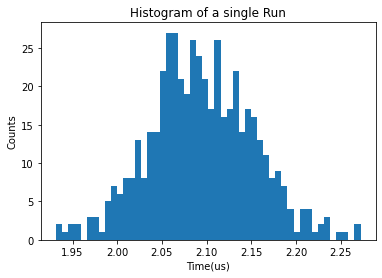

In [7]:
y, bins,_ = plt.hist(t_values,bins=50)
plt.ylabel("Counts")
plt.xlabel("Time(us)")
plt.title("Histogram of a single Run")

Mean: 2.0887019435909293
Precision/Standard Error of the Mean: 0.00010724434183957098
Standard Deviation: 0.0023980563855550557
Bias: -0.11129805640907087


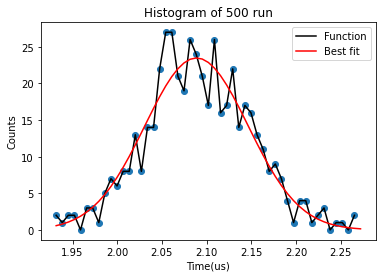

In [8]:
"""
I have used a gaussian fit from scipy to fit the results. I discussed with the tutors and they said it was okay.
"""
def func(x, a, x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

# %%
x = bins[:-1]
# Executing curve_fit on noisy data
popt, pcov = curve_fit(func, x, y)
std_dev = np.sqrt(np.diag(pcov))


#popt returns the best fit values for parameters of the given model (func)
print("Mean: "+str(popt[1]))
print ("Precision/Standard Error of the Mean: "+str(std_dev[1]/np.sqrt(n)))
print ("Standard Deviation: "+str(std_dev[1]))
print ("Bias: "+str((popt[1]-2.2)))


fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y, c='k', label='Function')
ax.scatter(x, y)
ym = func(bins, popt[0], popt[1], popt[2])
ax.plot(bins, ym, c='r', label='Best fit')
ax.set_xlabel("Time(us)")
ax.set_ylabel("Counts")
ax.set_title("Histogram of 500 run")
ax.legend()


The precision of the computational experiment with guassian fit is 0.0001 ( standard error of the mean). The true value could be estimated to that precision from the experiment. 

The system is obviously biased, there is a clear systmetic error from the arbitary cutoff of 10 microseconds. The sample size is usually higher for such an experiment as well. The bias of the system here is -0.1078 us.

In [20]:
# doing some basic mean
mean_t = np.mean(t_values)
std_t = np.std(t_values)
#popt returns the best fit values for parameters of the given model (func)
print("Mean: "+str(mean_t))
print ("Precision/Standard Error of the Mean: "+str(std_t/np.sqrt(n)))
print ("Standard Deviation: "+str(std_t))
print ("Bias: "+str((mean_t-2.2)))
print("The true value is within ~ {:.0f} sigma away from the mean.".format(np.abs(mean_t-2.2)/std_t))


Mean: 2.0941888253801197
Precision/Standard Error of the Mean: 0.002611160109907429
Standard Deviation: 0.058387315058888334
Bias: -0.10581117461988043
The true value is within ~ 2 sigma away from the mean.


The true value is within 2 sigma from the mean value. This is the required precision for the true value for any single experiment. 
The system is obviously biased, there is a clear systmetic error from the arbitary cutoff of 10 microseconds. The sample size is usually higher for such an experiment as well. The bias of the system here is -0.106 us. The precision of the mean value and the bias is the standard error of the mean : +/- 0.003 us.

